In [57]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch

In [58]:
# import datasets
iris = datasets.load_iris()
data = iris['data']
target = iris['target']

# split dataset into train and test sets
x_train, x_valid, y_train, y_valid = train_test_split(data, target,shuffle=True)

# normalization
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_valid = scaler.transform(x_valid)

x_train = torch.from_numpy(x_train).float()
y_train = torch.from_numpy(y_train).long()
x_valid = torch.from_numpy(x_valid).float()
y_valid = torch.from_numpy(y_valid).long()
# torch.long: 64-bit signed integer

print("x_train: {}".format(x_train.shape))
print("y_train: {}".format(y_train.shape))
print("x_valid: {}".format(x_valid.shape))
print("y_valid: {}".format(y_valid.shape))

x_train: torch.Size([112, 4])
y_train: torch.Size([112])
x_valid: torch.Size([38, 4])
y_valid: torch.Size([38])


In [59]:
from torch.utils.data import TensorDataset

train_dataset = TensorDataset(x_train, y_train)
valid_dataset = TensorDataset(x_valid, y_valid)

In [60]:
from torch.utils.data import DataLoader

batch_size = 32
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_dataloader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=True)

In [61]:
# define network
from model import Net

net = Net()

In [62]:
# define loss function
import torch.nn as nn

criterion = nn.CrossEntropyLoss()

In [63]:
# define optimization method
import torch.optim as optim

optimizer = optim.SGD(net.parameters(), lr=0.01)

In [64]:
# training
num_epoch = 50
dataloaders_dict = {
    "train": train_dataloader, 
    "val": valid_dataloader
}

losses = []
accs = []

for epoch in range(num_epoch):
    print("Epoch {}/{}".format(epoch+1, num_epoch))
    print("")

    for phase in ["train", "val"]:
        if (phase == "train"):
            net.train()

        else:
            net.eval()

        epoch_loss = 0.0
        epoch_corrects = 0

        for inputs, labels in dataloaders_dict[phase]:
            optimizer.zero_grad()
            with torch.set_grad_enabled(phase=="train"):
                outputs = net(inputs)
                loss = criterion(outputs, labels)
                _, preds = torch.max(outputs, 1)

                if (phase=="train"):
                    loss.backward()
                    optimizer.step()
                
                epoch_loss += loss.item() * inputs.size(0)
                epoch_corrects += torch.sum(preds==labels.data)
        
        epoch_loss = epoch_loss / len(dataloaders_dict[phase].dataset)
        epoch_acc = epoch_corrects.double() / len(dataloaders_dict[phase].dataset)

        if (phase=="train"):
            losses.append(epoch_loss)
        if (phase=="val"):
            accs.append(epoch_acc)

        print("{} Loss: {:.4f} Acc: {:.4f}".format(phase, epoch_loss, epoch_acc))

Epoch 1/50

train Loss: 1.0753 Acc: 0.6071
val Loss: 1.0807 Acc: 0.4474
Epoch 2/50

train Loss: 1.0687 Acc: 0.6429
val Loss: 1.0740 Acc: 0.4737
Epoch 3/50

train Loss: 1.0619 Acc: 0.6696
val Loss: 1.0677 Acc: 0.5000
Epoch 4/50

train Loss: 1.0553 Acc: 0.7232
val Loss: 1.0615 Acc: 0.6053
Epoch 5/50

train Loss: 1.0489 Acc: 0.7411
val Loss: 1.0551 Acc: 0.6842
Epoch 6/50

train Loss: 1.0424 Acc: 0.7946
val Loss: 1.0489 Acc: 0.6842
Epoch 7/50

train Loss: 1.0360 Acc: 0.8125
val Loss: 1.0428 Acc: 0.7632
Epoch 8/50

train Loss: 1.0298 Acc: 0.8571
val Loss: 1.0368 Acc: 0.7632
Epoch 9/50

train Loss: 1.0235 Acc: 0.8482
val Loss: 1.0306 Acc: 0.7632
Epoch 10/50

train Loss: 1.0172 Acc: 0.8482
val Loss: 1.0243 Acc: 0.7632
Epoch 11/50

train Loss: 1.0109 Acc: 0.8482
val Loss: 1.0180 Acc: 0.7895
Epoch 12/50

train Loss: 1.0045 Acc: 0.8482
val Loss: 1.0120 Acc: 0.7895
Epoch 13/50

train Loss: 0.9985 Acc: 0.8482
val Loss: 1.0059 Acc: 0.7895
Epoch 14/50

train Loss: 0.9924 Acc: 0.8482
val Loss: 1.0002

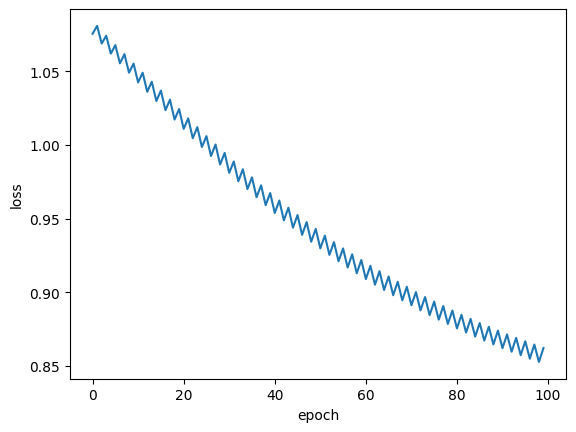

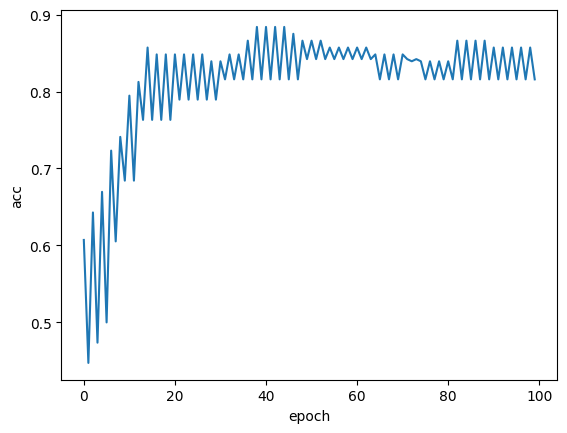

In [65]:
fig = plt.figure()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.plot(losses)
plt.show()

fig = plt.figure()
plt.xlabel("epoch")
plt.ylabel("acc")
plt.plot(accs)
plt.show()